# TIME SERIES 
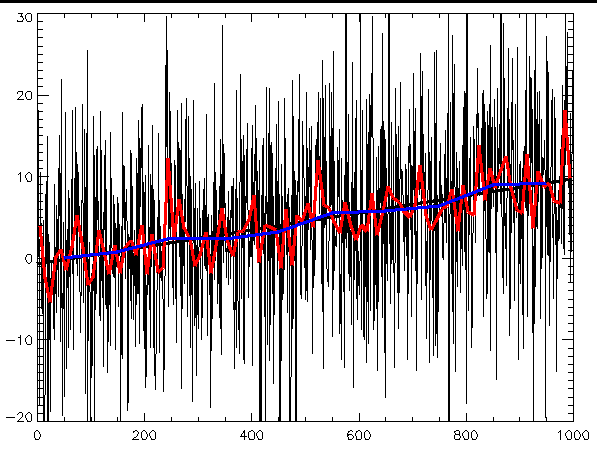

A time series is a sequence of numerical data points in successive order. In investing, it tracks the movement of the chosen data points at regular intervals and over a specified period of time.
So how is this different then just a basic forecast?


Components for Time Series Analysis

    Trend.
    Seasonal Variations.
    Cyclic Variations.
    Random or Irregular movements.

In [1]:
%matplotlib inline
import pandas as pd
# Load the data and set the DateTime index
data = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//rossmann.csv', skipinitialspace=True, low_memory=False)
print(data.shape)
data.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Because we are most interested in the Date column that contains the date of sales for each store, we will make sure to process that as a DateTime type, and make that the index of our dataframe.

In [2]:
data['Date2'] = pd.to_datetime(data['Date'])
type(data.Date2)

pandas.core.series.Series

In [3]:
data['Date2'].dt.year

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: Date2, Length: 1017209, dtype: int32

In [4]:
data.Date.dtype

dtype('O')

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day


In [6]:
data.shape

(1017209, 12)

In [7]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2,Year,Month,Day
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,2,5,6064,625,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,3,5,8314,821,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,5,5,4822,559,1,1,0,1,2015-07-31,2015,7,31


In [8]:
store1_data = data[data.Store == 1]
type(store1_data)

pandas.core.frame.DataFrame

In [9]:
store1_data.shape

(942, 12)

Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales)


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


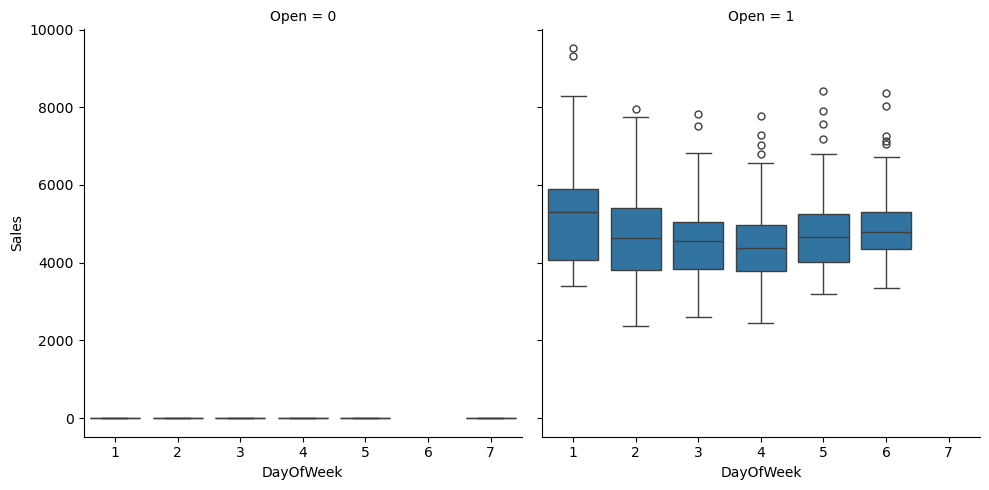

In [10]:

import seaborn as sns
%matplotlib inline
sns.catplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box' 
)

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


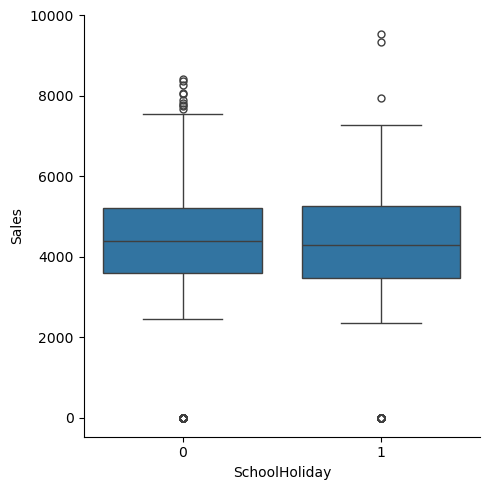

In [12]:
sns.catplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

What does the plot above tell us about school holiday's vs. regular days?

    Check: See if there is a difference affecting sales on promotion days.

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?


<Axes: xlabel='Date'>

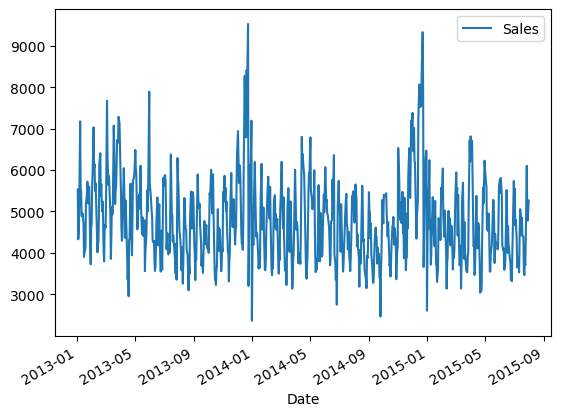

In [13]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()
#store1_data[['Sales']].plot()
#store1_open_data[['Sales','Customers']].plot()

In [23]:
# autocorrelation the degree of correlation over time: like R looking for close to perfect positive and perfect negative
data['Sales'].resample('M').mean().autocorr(lag=12)

0.8072797016452746

In pandas we can compute rolling average using the pd.rolling_mean or pd.rolling_median functions.

Data Refining Using Time Series Statistics


If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates. We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the resample command, which is very similar to the groupby command. It allows us to group over different time intervals.

We can use data.resample and provide as arguments: - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year - What aggregation to perform: 'mean', 'median', 'sum', etc.


In [26]:
data[['Sales']].resample('M').mean().head()

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383


In [19]:
data[['Sales']].resample('M').median().head()

,Sales
Date,
2013-01-31,5194.0
2013-02-28,5421.5
2013-03-31,5844.0
2013-04-30,5464.0
2013-05-31,5585.0


While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

In [24]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].rolling(window=3, center=True).mean().head()

,Sales
Date,
2015-07-31,NaN
2015-07-30,5021.666667
2015-07-29,4937.666667
2015-07-28,5298.333333
2015-07-27,5159.000000


<Axes: xlabel='Date'>

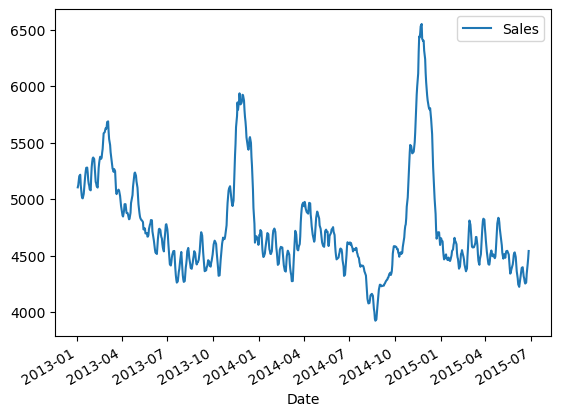

In [25]:
store1_open_data[['Sales']].rolling(window=30).mean().plot()

Pandas Window functions

Pandas rolling_mean and rolling_median are only two examples of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (a window) and produce an output.

In addition to rolling_mean and rolling_median, there are rolling_sum, rolling_min, rolling_max... and many more.

Another common one is diff, which takes the difference over time. pd.diff takes one arugment, periods, which is how many prio rows to use for the difference.


In [27]:
# computes the average sales, from the first date _until_ the date specified.
store1_open_data[['Sales']].sort_index().expanding(min_periods=1).sum()

,Sales
Date,
2013-01-02,5530.0
2013-01-03,9857.0
2013-01-04,14343.0
2013-01-05,19340.0
2013-01-07,26516.0
...,...
2015-07-27,3696778.0
2015-07-28,3701789.0
2015-07-29,3706571.0


Exercises

    Plot the distribution of sales by month and compare the effect of promotions


    Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

    Plot the 15 day rolling mean of customers in the stores
Identify the date with largest drop in sales from the same date in the previous month
Compute the total sales up until Dec. 2014



    Bonus 1: When were the largest differences between 15-day moving/rolling averages? HINT: Using rolling_mean and diff

    Bonus 2: Plot a 15 day exponentially weighted rolling mean of sales in stores HINT: We did not specifically do an example of this so you will have to search for info on that Pandas rollig type



## TIME SERIES MODELING

explore time series models, we will continue with the Rossmann sales data. This dataset has sales data for every Rossmann store for a 3-year period, as well as indicators of holidays and basic store information.

In the last class, we saw that we would plot the sales data at a particular store to identify how the sales changed over time. Additionally, we computed autocorrelation for the data at varying lag periods. This helps us identify if previous timepoints are predictive of future data and which time points are most important - the previous day? week? month?
https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [30]:
#example of a standard load
#### LOAD LIBRARIES
##### system
import sys, os
from time import time

##### Data
import pandas as pd
import numpy as np


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


#### Models
from sklearn.cluster import KMeans


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

import warnings
warnings.filterwarnings('ignore')

In [28]:
%matplotlib inline
import pandas as pd
# Load the data and set the DateTime index
data = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//rossmann.csv', 
                   skipinitialspace=True, 
                   index_col = 'Date',
                   parse_dates = True,
                   low_memory=False)
# data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


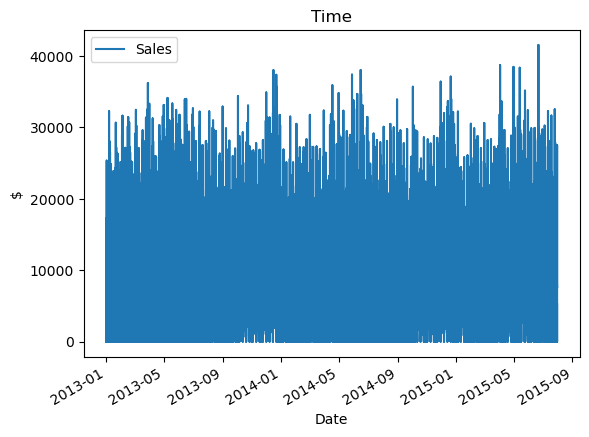

In [31]:
data[['Sales']].plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

In [32]:
# lets take a look at 1 store
# Filter to Store 1
store = data[data.Store == 1]

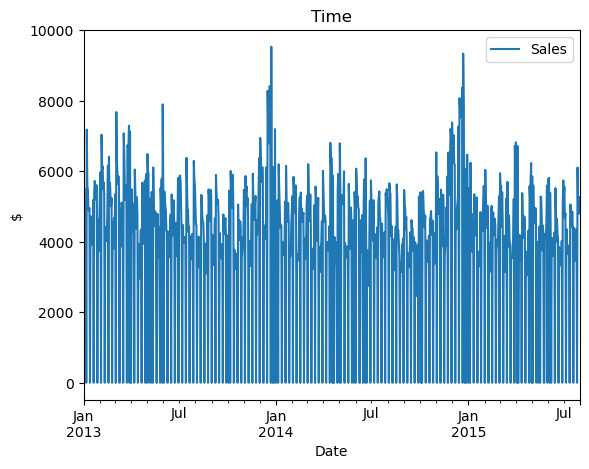

In [33]:
store[['Sales']].plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

In [34]:
# Filter to Store 1
store_open= store[store.Open == 1]

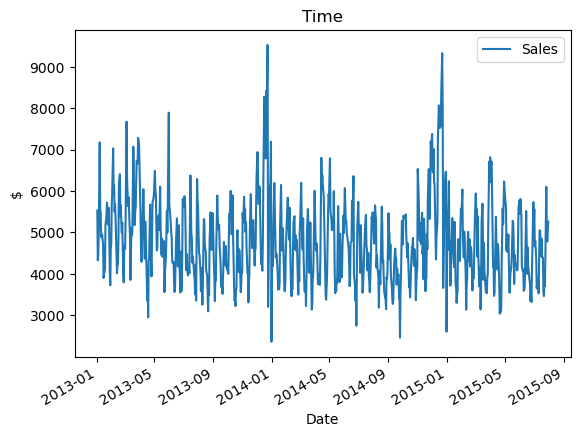

In [35]:
store_open[['Sales']].plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

In [36]:
import datetime
store_open['Date'] = (pd.date_range(start=datetime.datetime(2019, 1, 1),
                           periods=store_open.shape[0], freq='24H'))
store_open.set_index('Date', inplace = True)
store_open

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2019-01-01,1,5,5263,555,1,1,0,1
2019-01-02,1,4,5020,546,1,1,0,1
2019-01-03,1,3,4782,523,1,1,0,1
2019-01-04,1,2,5011,560,1,1,0,1
2019-01-05,1,1,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...
2021-02-15,1,1,7176,785,1,1,0,1
2021-02-16,1,6,4997,635,1,0,0,1
2021-02-17,1,5,4486,619,1,0,0,1


In [ ]:
store_open.info()

# Term
Lagging and shifting are ways to understand previous days sales vs todays sales or last 5 days returns. 
We have done this concept a lot in excel when we subtract a date of sales from a previous data of sales. 

a lag plot is a good starting point to understand some clues into our data and what kind of model to use.

    A linear shape to the plot suggests that an autoregressive model is probably a better choice.
    An elliptical plot suggests that the data comes from a single-cycle sinusoidal model.
    
    - autoregressive(predicting future values based on past values)
    - sinusoidal model( sinusoidal is looking for the curve more on this in a minute)

![lp-outliers.webp](attachment:lp-outliers.webp)

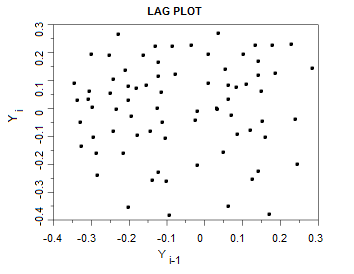

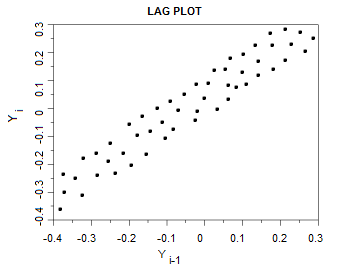

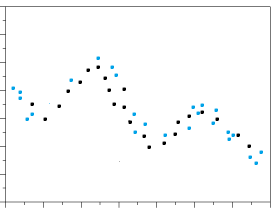

concept of sinusoidal
first it comes from the Math term of Sine
The sine function can be defined as the ratio of the length of the opposite side to that of the hypotenuse in a right-angled triangle. The sine function is used to find the unknown angle or sides of a right triangle.

sinusoidal: of, relating to, shaped like, or varying according to a sine curve or sine wave

Think about the tide coming into a beach and the hieght of it
at the highest point it is 12am and 10ft 8hrs later at 8am at the lowest that is 2ft
there would not be a straight line but there would be a curve over time to show the first part of this cycle. The second part of the cycle is the tide rising again. 
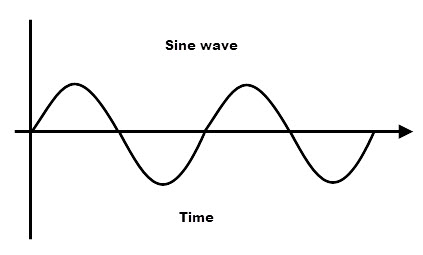

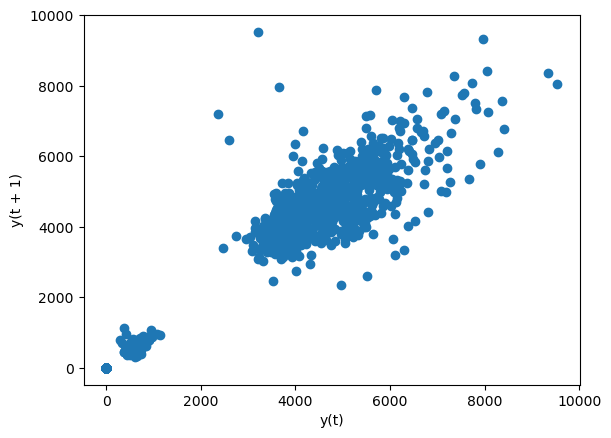

In [37]:
# import lag_plot function
from pandas.plotting import lag_plot
# lag scatter plot
lag_plot(store_open)
plt.show()

here is some interesting data in here, what do you see? do you think sinusodal ie no clear patterns or autoregressive clear patterns. 

In [38]:
# Check for missing data
nulls = (store_open.isnull().values.any())
NaN = (store_open.isna().values.any())
print('Nans :',NaN, "\n"'Nulls:', nulls)

Nans : False 
Nulls: False


In [39]:
# drop zero values
store_open = store_open[store_open['Sales'] != 0]

In [40]:
# a tool for any blanks
## remove any blanks
for col in store_open:
    blanks = []
    if store_open.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


In [41]:
#never assume the data is what you expect
# Remove blank spaces
store_open = store_open.replace(" ", "")

In [42]:
store_open.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,781.0,781.000000,781.000000,781.000000,781.0,781.000000,781.000000
mean,1.0,3.504481,4759.096031,564.049936,1.0,0.448143,0.204866
std,0.0,1.714656,1012.106393,93.707476,0.0,0.497622,0.403862
min,1.0,1.000000,2362.000000,298.000000,1.0,0.000000,0.000000
25%,1.0,2.000000,4000.000000,500.000000,1.0,0.000000,0.000000
50%,1.0,3.000000,4647.000000,550.000000,1.0,0.000000,0.000000
75%,1.0,5.000000,5348.000000,612.000000,1.0,1.000000,0.000000
max,1.0,6.000000,9528.000000,1130.000000,1.0,1.000000,1.000000


In [43]:
store_open_null = store_open.isnull().any()
print(store_open_null)

Store            False
DayOfWeek        False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool


#### Auto correlation
degrees of simularity between given time series and lagged versions of itself. Measures current values over past values. +1 is a perfect correlation and - 1 is a perfect negative correlation


Check Compute the autocorrelation of Sales in Store 1 for lag 1 and 2. Will we be able to use a predictive model - particularly an autoregressive one


In [44]:
print(store_open.Sales.autocorr(lag=1)) # -0.13
print(store_open.Sales.autocorr(lag=2)) # -0.03

0.6826908242279429
0.4812172661460727


We do see some minimal correlation in time, however it is not super strong. Still this does imply an AR model can be useful. An easier way to diagnose this may be to plot many autocorrelations at once.

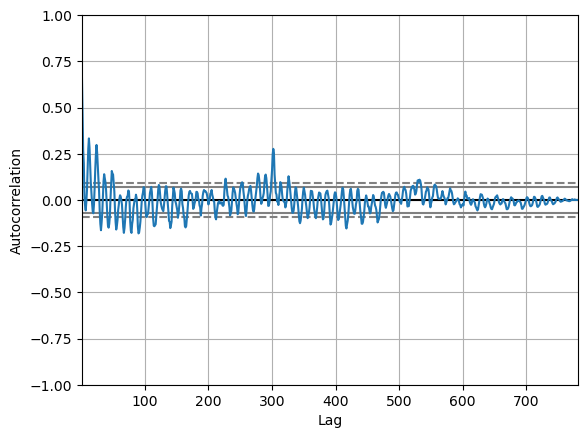

In [45]:
%matplotlib inline
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(store_open.Sales)
plt.show()

What we see here is the strong negative -1 and strong positive +1 as the range and lags input to evaluate the strength. 

This shows a typical pattern of an autocorrelation plot - it should decrease to 0 as lag increases! However, it's hard to observe exactly what the values are.

We will use statsmodels to code AR, MA, ARMA and ARIMA models.

statsmodels is a machine learning package, similar to sckit-learn. While it lacks many of the features of scikit-learn for evaluation and production level models, it does include many more niche statistical models, including time series models. It also provides a nice summary utility to help diagnose models.

statsmodels also has a better autocorrelation plot, which can look at fixed numbers of lag values.


In [46]:
store_open.shape

(781, 8)

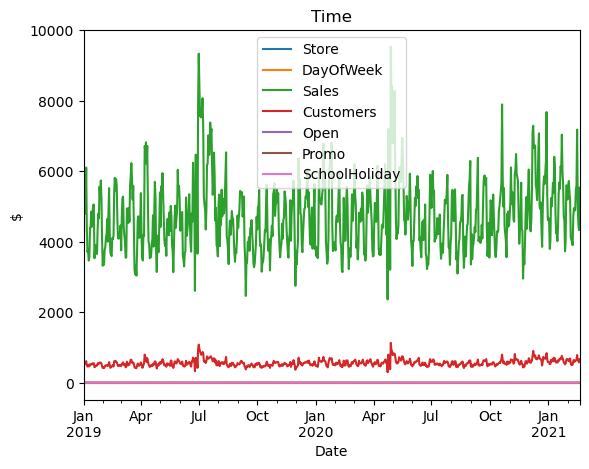

In [47]:
store_open.plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

#### Stationarity
A stationary time series is one whose properties do not depend on the time at which the series is observed. 


3 types
- Strict Stationary – Satisfies the mathematical definition of a stationary process. Mean, variance & covariance are not a function of time.
- Seasonal Stationary – Series exhibiting seasonality.
- Trend Stationary – Series exhibiting trend.

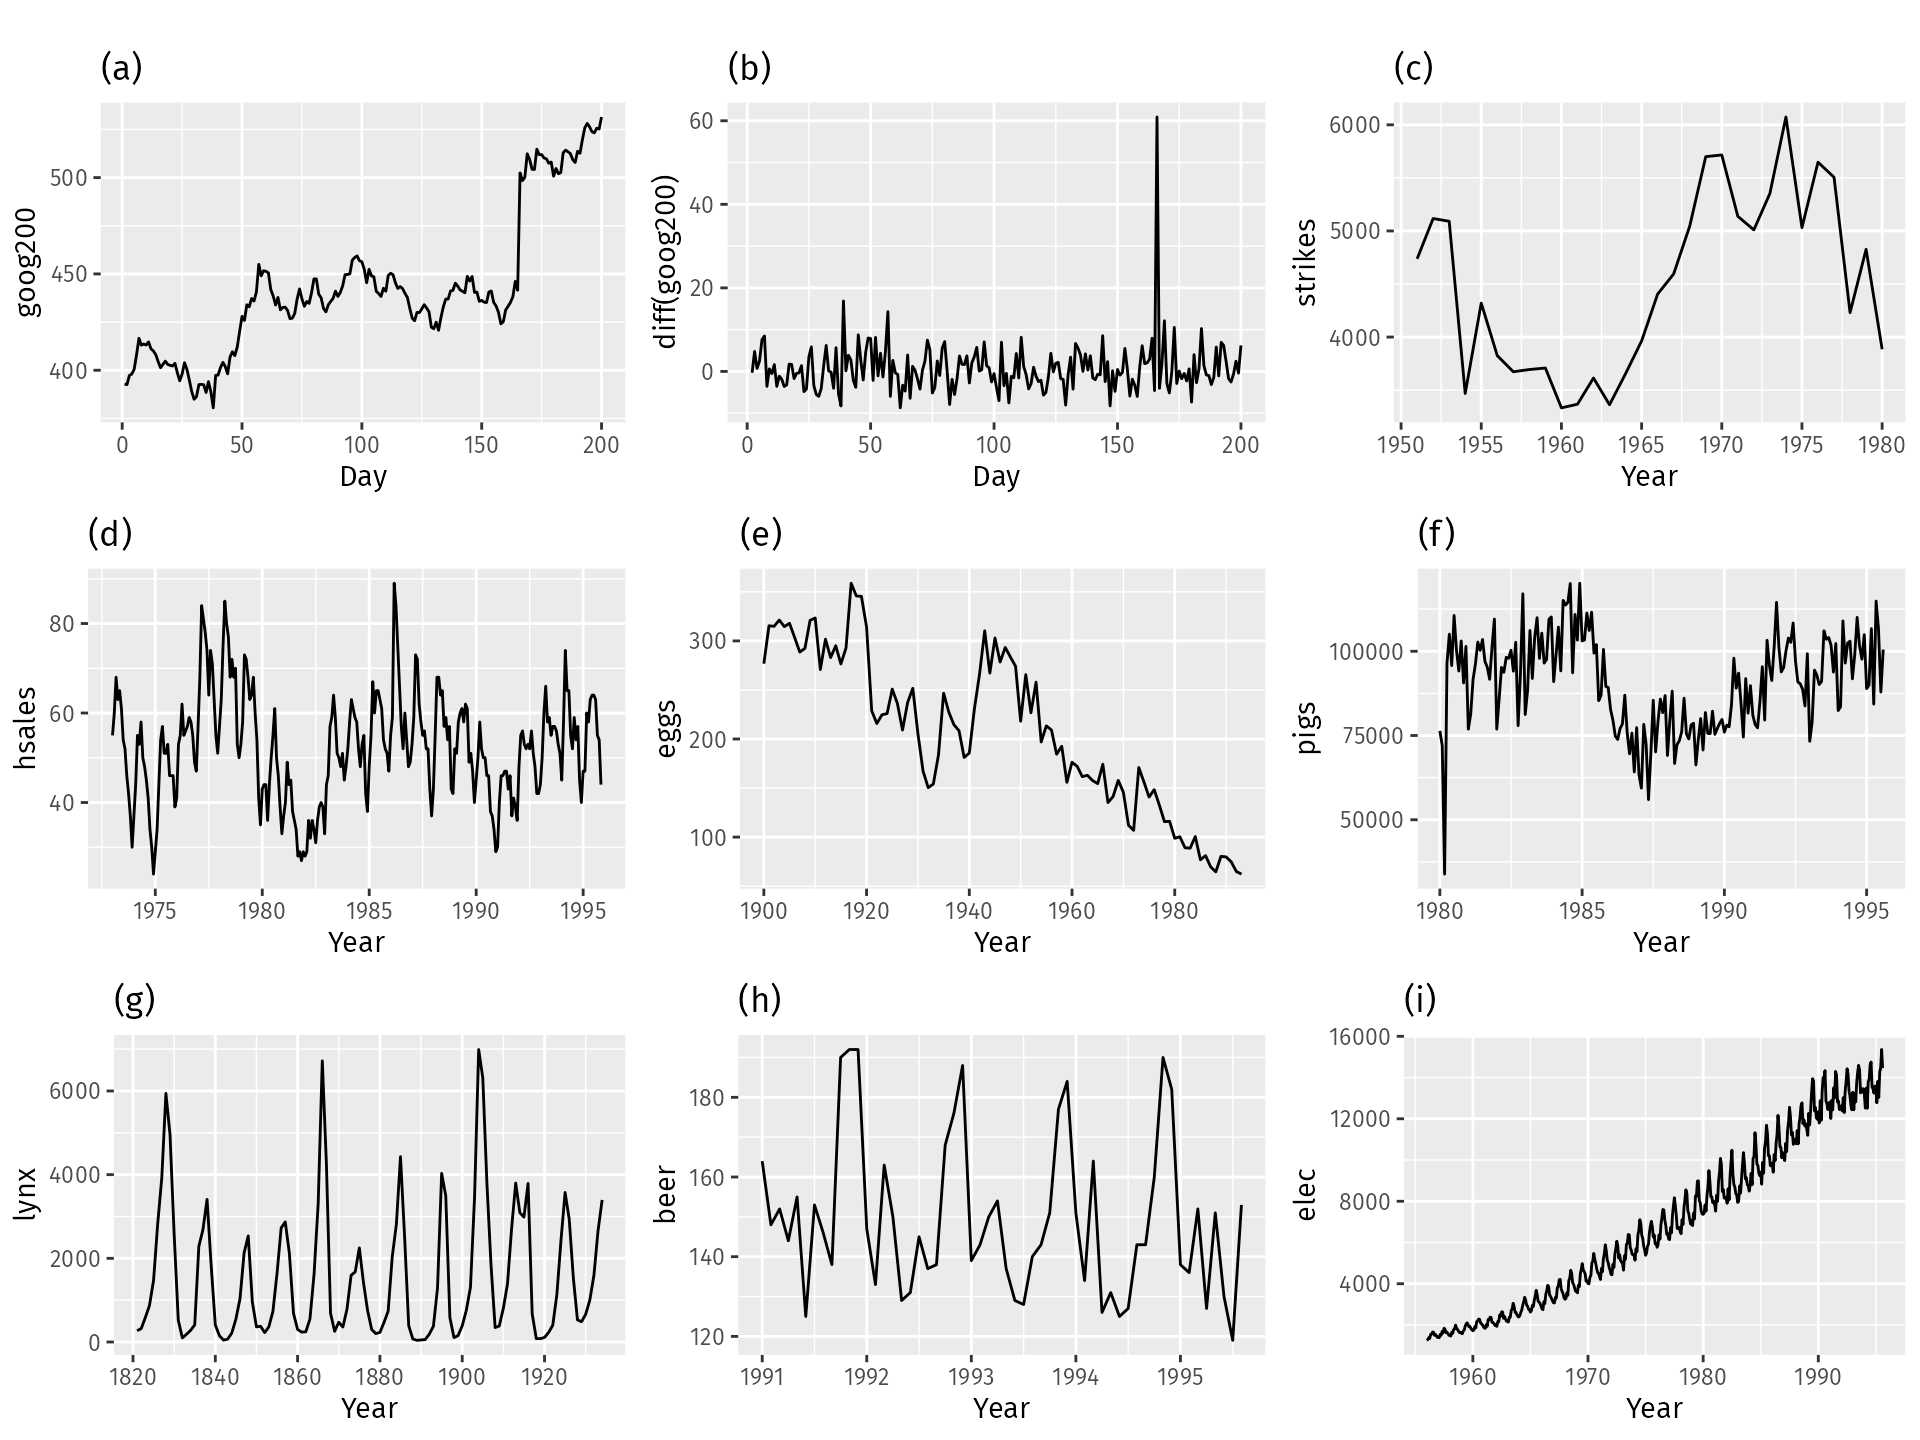
Which of these series are stationary? (a) Google stock price for 200 consecutive days; (b) Daily change in the Google stock price for 200 consecutive days; (c) Annual number of strikes in the US; (d) Monthly sales of new one-family houses sold in the US; (e) Annual price of a dozen eggs in the US (constant dollars); (f) Monthly total of pigs slaughtered in Victoria, Australia; (g) Annual total of lynx trapped in the McKenzie River district of north-west Canada; (h) Monthly Australian beer production; (i) Monthly Australian electricity production. 

more detail: https://otexts.com/fpp2/stationarity.html

#### Adfuller tests for stationarity
Null hypothesis: Non Stationarity exists in the series.

Alternative Hypothesis: Stationarity exists in the series

In [48]:
   print(store_open.shape)

(781, 8)


In [49]:
from statsmodels.tsa.stattools import adfuller
def adf_results(timeseries):
    ('ADF Test:')
    adf = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (adfoutput)
adf_results(store_open['Sales'])

Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
dtype: float64


Test statistic is the T score interpretation of this score depends on the size of the sample the higher the negative score, the strong the rejectoin of th hypothesis
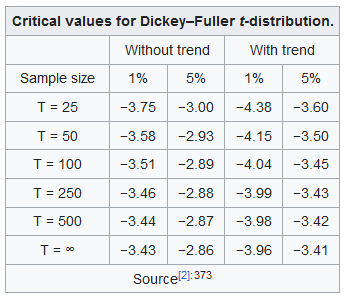


The sample size is over 500 and so the -5 is not great +1 for hypotheis

p score is the probability that the null hypothesis will not be rejected +1 for hypothesis
Number of lags used AIC is the models best pick, you can adjust this. 

overall we can accept the hypthesis that stationarity exists in the data and reject the null

#### prepare data for Arima Model


    Report the annotated findings with visualizations of your data analysis, including the following elements:

•   the presence or lack of a seasonal component

•   trends

•   auto correlation function

•   spectral density

•   the decomposed time series

•   confirmation of the lack of trends in the residuals of the decomposed series

    Identify an autoregressive integrated moving average (ARIMA) model that takes into account the observed trend and seasonality of the time series data.

    Perform a forecast using the derived ARIMA model.

    Provide the output and calculations of the analysis you performed.

    Provide the code used to support the implementation of the time series model.


In [50]:
store_open.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2019-01-01,1,5,5263,555,1,1,0,1
2019-01-02,1,4,5020,546,1,1,0,1
2019-01-03,1,3,4782,523,1,1,0,1
2019-01-04,1,2,5011,560,1,1,0,1
2019-01-05,1,1,6102,612,1,1,0,1


In [51]:
store_open.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2021-02-15,1,1,7176,785,1,1,0,1
2021-02-16,1,6,4997,635,1,0,0,1
2021-02-17,1,5,4486,619,1,0,0,1
2021-02-18,1,4,4327,578,1,0,0,1
2021-02-19,1,3,5530,668,1,0,0,1


In [52]:
# Let's take a sample of 1 year of data
X = store_open[['Sales']].loc[:'2019-11-30']
y = store_open[['Sales']].loc['2020-12-01':]
print('X', X.shape)
print('y', y.shape)

X (334, 1)
y (81, 1)


In [ ]:
X

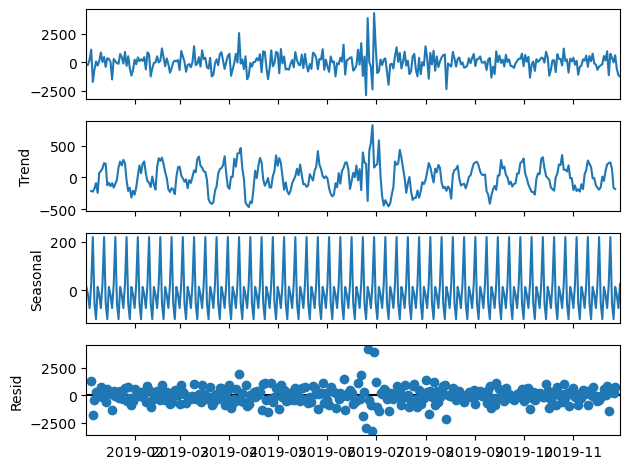

In [53]:
# Decompose the training set
df_diff = X.diff().dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_diff, model='additive')
decomp.plot()
plt.show()

In [54]:
df_diff

,Sales
Date,
2019-01-02,-243.0
2019-01-03,-238.0
2019-01-04,229.0
2019-01-05,1091.0
2019-01-06,-1738.0
...,...
2019-11-26,-23.0
2019-11-27,600.0
2019-11-28,-576.0


#### seasonal_decompoose
- number of observations
- Trend do you see  an upward or downward trend
- seasonality do you see an cyclical pattern?
- The residual is what's left over after trends and seasonality are removed. Time series models assume that the data is stationary and only the residual component satisfies the conditions for stationarity. 


<Axes: xlabel='Date'>

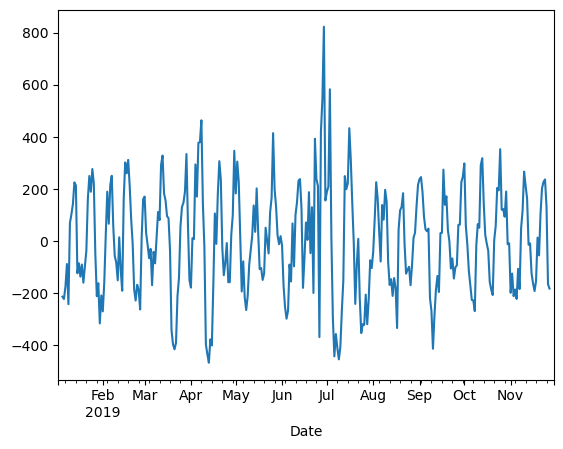

In [55]:
decomp.trend.plot()

(array([1.95281272e+09, 9.13754532e+08, 9.33038420e+06, 7.75514643e+06,
        4.86776314e+06, 2.86001064e+06, 4.24841837e+06, 1.22383061e+06,
        1.10286180e+06, 6.04023208e+06, 8.99686278e+06, 2.06149970e+06,
        4.47966941e+06, 2.72806837e+05, 4.67731024e+06, 4.41164055e+06,
        2.20229956e+06, 1.26787296e+06, 9.88260265e+05, 1.23207036e+06,
        7.53097809e+06, 1.55198818e+07, 4.68401114e+06, 1.83385707e+06,
        1.81171139e+06, 6.43891074e+05, 2.58880005e+05, 6.52781969e+05,
        5.79997416e+05, 7.52973064e+03, 4.94999120e+05, 5.00932110e+05,
        3.08678138e+05, 3.22533417e+04, 5.01270610e+05, 4.85295020e+05,
        2.90467718e+05, 1.11393363e+06, 3.26794006e+05, 1.15274436e+05,
        5.22599217e+05, 7.37785243e+05, 2.71585067e+05, 2.88832947e+05,
        2.24665713e+06, 1.85640982e+06, 2.19482762e+05, 1.72047174e+06,
        1.55809804e+06, 3.38729472e+05, 1.64632096e+05, 3.15076666e+05,
        3.45040797e+05, 7.65539318e+05, 5.92405376e+05, 3.661557

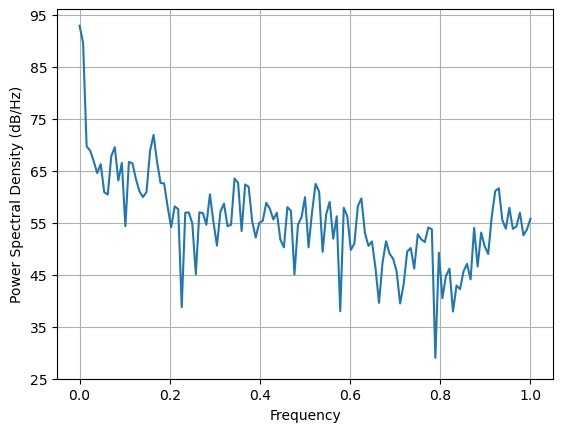

In [56]:
# power of specteral density
'''
show shows the strength of the variations as a function of how frequent. 

'''
plt.psd(X['Sales'])

In [ ]:
# y axis shows the  power vs X access frequency 0.0 is powerful density with low frequency. 

<Axes: xlabel='Date'>

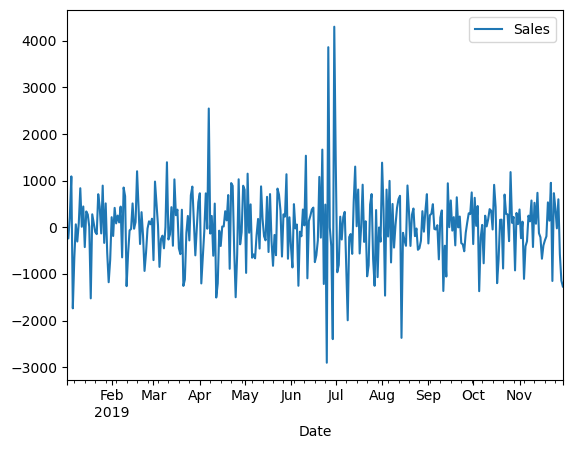

In [57]:
# diff computes the difference or deltas
df_train_diff = X.diff().dropna()
df_train_diff.plot()

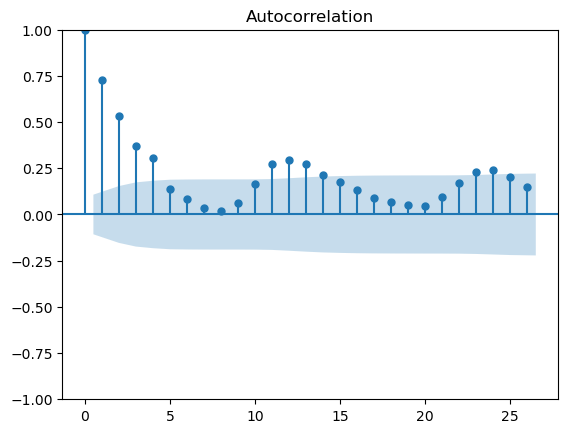

In [58]:
# ACF plots show the correlation between a time series and lagged versions of itself. 
#The ACF plot can be used to identify the number of lags that are needed for a 
# time series model. For example, if the ACF plot shows a strong correlation between the 
# time series and its lag-1, lag-2, and lag-3 values, then a time series model that 
# includes these lags would likely be a good fit.

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(X);

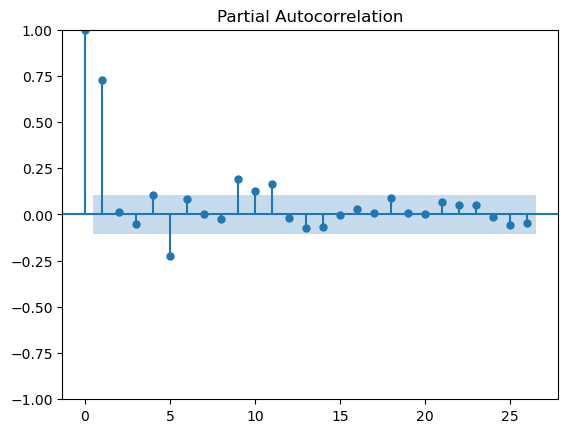

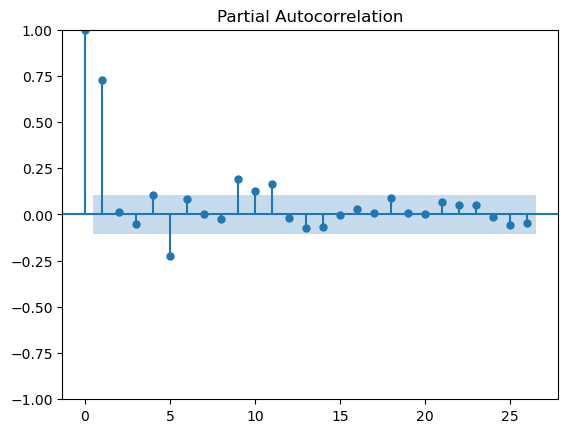

In [59]:
'''
To interpret ACF and PACF plots, we can look for the following patterns:

    A sharp cutoff in the ACF plot at a particular lag suggests that a time series model with a corresponding number 
    of lags would be a good fit.
    A slowly decaying ACF plot may indicate the presence of a trend in the data.
    A slowly decaying PACF plot may indicate the presence of seasonality in the data.
    A sharp cutoff in the PACF plot at a particular lag may indicate the presence of a seasonal pattern in the data.
'''
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(X)

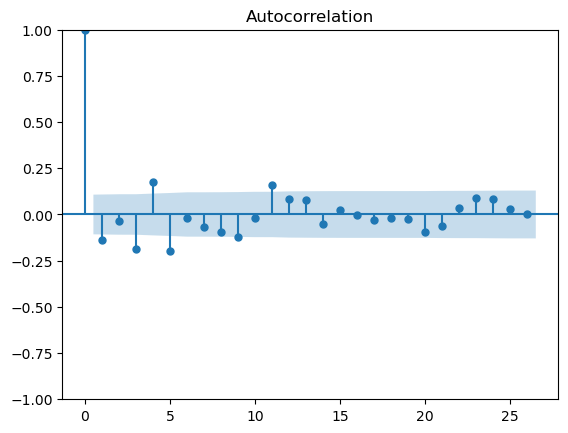

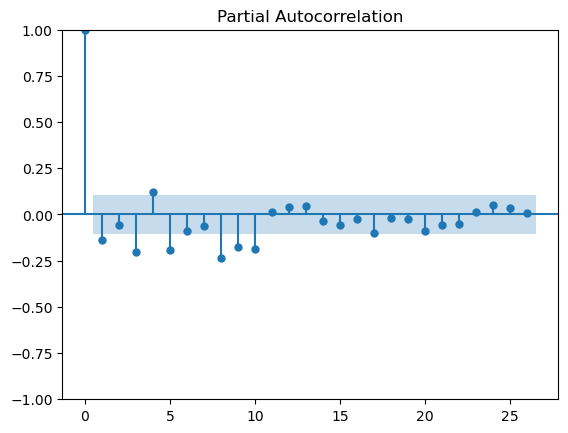

In [60]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [61]:
adf_results(df_train_diff['Sales'])

Test Statistic                -1.122789e+01
p-value                        1.939976e-20
#Lags Used                     9.000000e+00
Number of Observations Used    3.230000e+02
dtype: float64


In [ ]:
# quick breakouts discussion how would you interpret these results?

#### choosin p d and q for the arima model

- p is the number of autogressive terms
- d is the number of non seasonal differences needed for stationary 
- q is the number of lagged forecast errors

tuning these numbers

1) Test for stationarity using the augmented dickey fuller test.
If the time series is stationary try to fit the ARMA model, and if the time series is non-stationary then seek the value of d. 
2) If the data is getting stationary then draw the autocorrelation and partial autocorrelation graph of the data.
3) Draw a partial autocorrelation graph(ACF) of the data. This will help us in finding the value of p because the cut-off point to the PACF is p. 
4) Draw an autocorrelation graph(ACF) of the data. This will help us in finding the value of q because the cut-off point to the ACF is q.


In [62]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X, order=(3,3,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  334
Model:                 ARIMA(3, 3, 0)   Log Likelihood               -2776.083
Date:                Tue, 06 Feb 2024   AIC                           5560.165
Time:                        18:48:39   BIC                           5575.374
Sample:                    01-01-2019   HQIC                          5566.231
                         - 11-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2041      0.042    -28.968      0.000      -1.286      -1.123
ar.L2         -0.9543      0.052    -18.252      0.000      -1.057      -0.852
ar.L3         -0.5820      0.030    -19.367      0.0

Forecasting using ARIMA Model

The submission provides an accurate forecast using the derived ARIMA model identified in part D2.


In [63]:
mae = np.mean(np.abs(model_fit.resid))
print("The mean absolute error is:", round(mae,2))

The mean absolute error is: 827.42


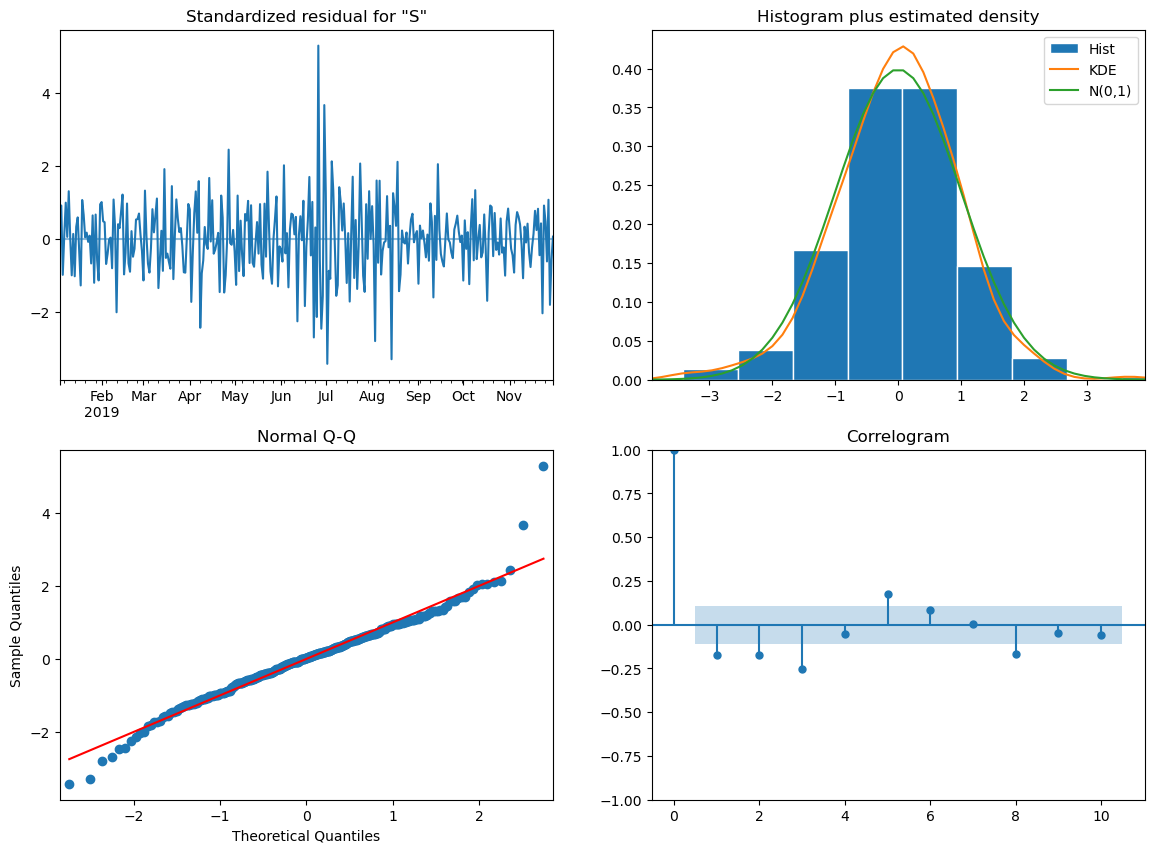

In [64]:
model_fit.plot_diagnostics(figsize=(14,10))
plt.show()

In [65]:
pred = model_fit.get_prediction()
print(pred.summary_frame(alpha=0.05))

Sales               mean      mean_se  mean_ci_lower  mean_ci_upper
2019-01-01      0.000000  2649.530140   -5192.983651    5192.983651
2019-01-02  11402.822071  2035.739903    7412.845179   15392.798964
2019-01-03   5537.801196  1471.528773    2653.657799    8421.944592
2019-01-04   4009.689453  1203.819735    1650.246128    6369.132779
2019-01-05   5041.416126  1157.005548    2773.726921    7309.105330
...                  ...          ...            ...            ...
2019-11-26   5791.199446  1061.849112    3710.013430    7872.385462
2019-11-27   4597.205836  1061.849112    2516.019820    6678.391853
2019-11-28   7077.822445  1061.849112    4996.636429    9159.008461
2019-11-29   4632.540799  1061.849112    2551.354782    6713.726815
2019-11-30   2680.857646  1061.849112     599.671630    4762.043662

[334 rows x 4 columns]


In [66]:
model_fit.forecast(90)

2019-12-01    1.287986e+03
2019-12-02   -1.061274e+03
2019-12-03   -3.654227e+03
2019-12-04   -6.564347e+03
2019-12-05   -9.912499e+03
                  ...     
2020-02-24   -1.679167e+06
2020-02-25   -1.716977e+06
2020-02-26   -1.755207e+06
2020-02-27   -1.793857e+06
2020-02-28   -1.832926e+06
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

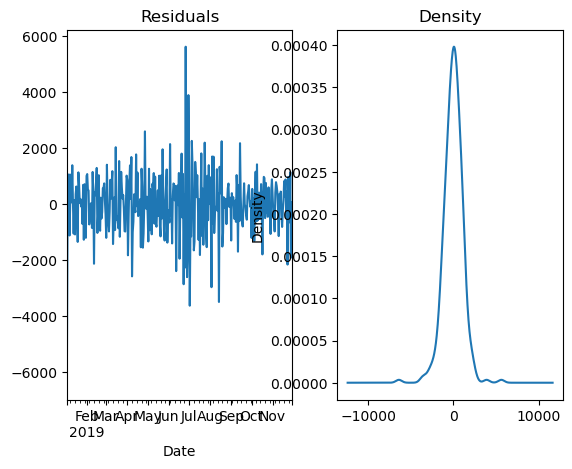

In [67]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [68]:
# prediction for quarter
pred = model_fit.predict(start=640, end=790, type='levels')
print(pred)

2020-10-02   -2.023549e+07
2020-10-03   -2.036603e+07
2020-10-04   -2.049699e+07
2020-10-05   -2.062837e+07
2020-10-06   -2.076017e+07
                  ...     
2021-02-25   -4.373564e+07
2021-02-26   -4.392744e+07
2021-02-27   -4.411966e+07
2021-02-28   -4.431230e+07
2021-03-01   -4.450536e+07
Freq: D, Name: predicted_mean, Length: 151, dtype: float64


<Axes: xlabel='Date'>

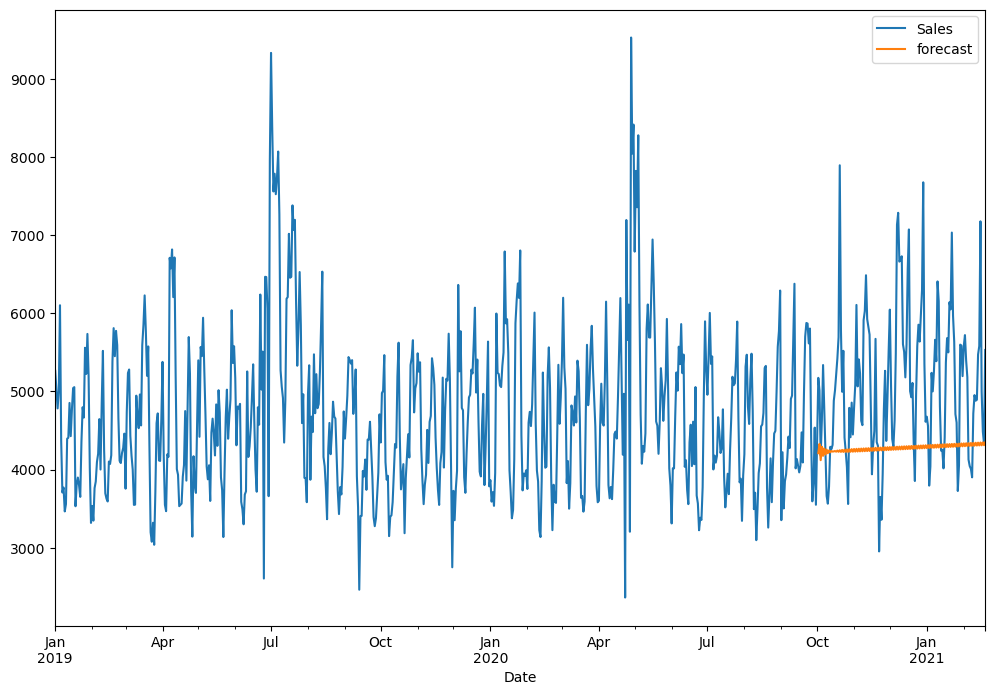

In [69]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(store_open['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,2))
results=model.fit()


store_open['forecast']=results.predict(start=640,end=790,dynamic=True)
store_open[['Sales','forecast']].plot(figsize=(12,8))

A correlation plot will help determin D

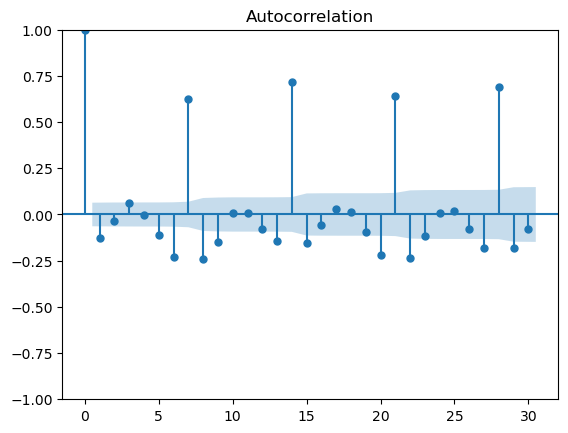

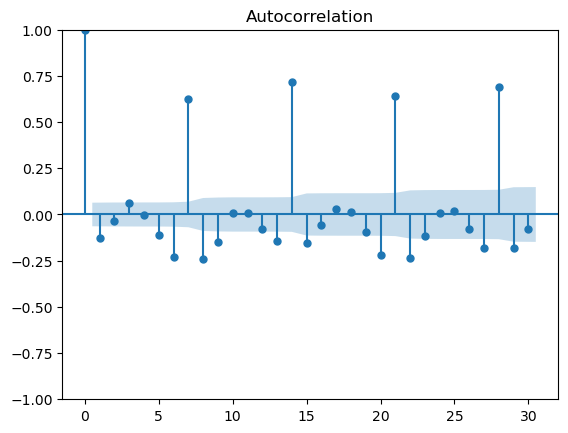

In [70]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(store.Sales)

TIME SERIES EXTRA 
https://www.kaggle.com/code/bextuychiev/every-pandas-function-to-manipulate-time-series

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
#### Loading the data and setting the DateTimeIndex

In [ ]:
data = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//time_series_train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head(100)

Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per department

Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

Compute the 1, 2, 52 autocorrelations for Weekly_Sales and/or create an autocorrelation plot.

Split the weekly sales data in a training and test set - using 75% of the data for training. Remember this is not a typical test/train random split but rather splitting the time series data into chuncks chronologically.

Plot the residuals - where are their significant errors.

Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.